# Employee Attrition Prediction
#### Predicting whether an employee will leave the organization or not from Kaggle's HR Employee Attrition dataset.

By: Nilesh Ranjan

In [1]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

The data I'm working on is a small dataset having 1470 rows and 35 columns, including the target variable - 'Attrition' i.e whether an employee will leave the organization or not.

In [2]:
# LOADING THE DATASET

data = pd.read_csv("HR-Employee-Attrition.csv")

Missing values are usually represented in the form of Nan or null or None in the dataset.

df.info() function can be used to give information about the dataset. This will provide you with the column names along with the number of non – null values in each column.

Another way of finding null values in the data is by using the isnull() function.

In [3]:
# CHECKING FOR MISSING VALUES

data.info()

#data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

So, our data has no missing values. 
Also, it is a good practice to always have the target variable as the last column in the dataset. 

In [4]:
# RE-STRUCTURING DATA

move = data.pop('Attrition')
data.insert(34, 'Attrition', move)

# PREVIEWING COMPLETE DATA

pd.set_option('display.max_columns', None)
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


Using Label Encoding, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).

Using the preprocessing module from sklearn package and LabelEncoder class.

In [5]:
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['Over18'] = le.fit_transform(data['Over18'])
data['OverTime'] = le.fit_transform(data['OverTime'])
data['Attrition'] = le.fit_transform(data['Attrition'])

In [6]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0


The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. 

__Normalization__ scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. 

__Standardization__ scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

Here, I've standardized & then normalized the essential prediction features of the dataset using the scikit-learn object StandardScaler & MinMaxScaler respectively.

In [7]:
# STANDARDIZING DATA

new = pd.DataFrame(scaler.fit_transform(data[['Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime', 
                                              'RelationshipSatisfaction', 'WorkLifeBalance']]), 
                                        columns = ['Age', 'EnvironmentSatisfaction', 'JobSatisfaction',  'OverTime',
                                                   'RelationshipSatisfaction', 'WorkLifeBalance'])

new.head()

,Age,EnvironmentSatisfaction,JobSatisfaction,OverTime,RelationshipSatisfaction,WorkLifeBalance
0,0.446350,-0.660531,1.153254,1.591746,-1.584178,-2.493820
1,1.322365,0.254625,-0.660853,-0.628241,1.191438,0.338096
2,0.008343,1.169781,0.246200,1.591746,-0.658973,0.338096
3,-0.429664,1.169781,0.246200,1.591746,0.266233,0.338096
4,-1.086676,-1.575686,-0.660853,-0.628241,1.191438,0.338096


In [8]:
# NORMALIZING DATA

newTrain = pd.DataFrame(scaling.fit_transform(new[['Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime', 
                                                   'RelationshipSatisfaction', 'WorkLifeBalance']]), 
                                        columns = ['Age', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime',
                                                   'RelationshipSatisfaction', 'WorkLifeBalance'])

newTrain.head()

,Age,EnvironmentSatisfaction,JobSatisfaction,OverTime,RelationshipSatisfaction,WorkLifeBalance
0,0.547619,0.333333,1.000000,1.0,0.000000,0.000000
1,0.738095,0.666667,0.333333,0.0,1.000000,0.666667
2,0.452381,1.000000,0.666667,1.0,0.333333,0.666667
3,0.357143,1.000000,0.666667,1.0,0.666667,0.666667
4,0.214286,0.000000,0.333333,0.0,1.000000,0.666667


The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

In [9]:
# TRAIN-TEST SPLITTING

from sklearn.model_selection import train_test_split

x = newTrain
y = data.iloc[:,34]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Here, I'm applying the K-Nearest Neighbour (KNN) algorithm for classifying the data as per the target variable. KNN algorithm is used for both classification and regression problems. It is based on feature similarity approach.

In [20]:
# APPLYING K-NEAREST NEIGHBOUR CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

Predicting the trained results and evaluating model accuracy.

In [21]:
# PREDICTING RESULTS

pred = knn.predict(x_test)

In [22]:
# ACCURACY SCORE

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8752834467120182

Checking the accuracy for different values of 'K' ranging from 1-55 in order to find the highest score.

In [23]:
error_rate = []

for i in range(1,55):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(accuracy_score(y_test, pred_i))
    
np.max(error_rate)

0.8752834467120182

Visualizing the values of K vs the accuracy score on each of them.

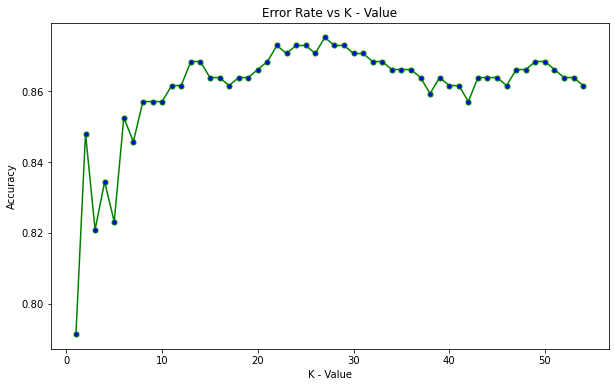

In [24]:
# VISUALIZING ERROR RATE vs K-VALUE

plt.figure(figsize=(10,6))
plt.plot(range(1,55), error_rate, color = 'green', linestyle = '-', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Error Rate vs K - Value')
plt.xlabel('K - Value')
plt.ylabel('Accuracy')
plt.show()

In [15]:
# LOGISTING REGRESSION 

from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state = 20)

logclassifier.fit(x_train, y_train)
pred = logclassifier.predict(x_test)
accuracy_score(y_test, pred)

0.8594104308390023

In [16]:
# SUPPORT VECTOR CLASSIFIER

from sklearn.svm import SVC
svcclassifier = SVC(kernel = "rbf", random_state = 20)

svcclassifier.fit(x_train, y_train)
pred = svcclassifier.predict(x_test)
accuracy_score(y_test, pred)

0.8594104308390023

In [17]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 20)

dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)

0.8639455782312925

In [18]:
# RANDOM FOREST CLASSIFIER

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, random_state = 20) 

RF.fit(x_train, y_train)
pred = RF.predict(x_test)
accuracy_score(y_test, pred)

0.8435374149659864

In [19]:
# GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
gb_model = GradientBoostingClassifier(n_estimators = 15, random_state = 20)

gb_model.fit(x_train, y_train)
roc_auc_score(y_test, gb_model.predict_proba(x_test)[:, 1])

0.7467166563137813